In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input, LeakyReLU
from tensorflow.keras.optimizers import SGD, AdamW

c:\Users\DS-31\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


### Fetching and loading the dataset with url

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=columns)

# Glance of the data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### About the dataset

- Pima Indian Diabetes Dataset
- Originally from the National Institute of Diabetes and Digestive and Kidney Diseases
- Contains information of 768 women from a population near Phoenix, Arizona, USA
- Outcome tested was Diabetes
- 258 tested positive and 500 tested negative
- One target (dependent) variable
- The 8 attributes: pregnancies, OGTT(Oral Glucose Tolerance Test), blood pressure, skin thickness, insulin, BMI(Body Mass Index), age, pedigree diabetes function
- The Pima population has been under study by the National Institute of Diabetes and Digestive and Kidney Diseases at intervals of 2 years since 1965
- Pima Indians Diabetes Dataset includes information about attributes that could be related to the onset of diabetes and its future complications

### Data preprocessing

In [3]:
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

# spliting the data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# feature transformation
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

X_train_std, X_val_std, y_train, y_val = train_test_split(X_train_std, y_train, test_size=0.2, random_state=42)

print(f"Training input shape is {X_train_std.shape}")
print(f"Validation input shape is {X_val_std.shape}")
print(f"Testing input shape is {X_test_std.shape}")

Training input shape is (491, 8)
Validation input shape is (123, 8)
Testing input shape is (154, 8)


### Building a MLP

In [ ]:
def build_and_compile_model(
        input_dim=X_train_std.shape[1],
        hidden_layers=[64,32,16], # default
        hidden_activation='relu',
        output_activation='sigmoid',
        lr=0.001, # default
        loss_func='binary_crossentropy',
        metric='accuracy'):
    """
    Interactive function to build, compile, and summarize a Sequential model
    """
    # Model Definition 
    model = Sequential()  # Layers are arranged linearly; one after another

    # Defining the input layer explicitly with shape matching the number of features
    model.add(Input(shape=(input_dim,)))

    # Adding hidden layers automatically
    for units in hidden_layers:
        model.add(Dense(units))                 # Number of hidden nodes
        #model.add(Activation(hidden_activation))  # Non-linearity
        model.add(LeakyReLU(alpha=0.01))

    # Output layer
    model.add(Dense(1))
    model.add(Activation(output_activation))

    # -------- Compile --------
    model.compile(
        optimizer=AdamW(learning_rate=lr,weight_decay=0.001),
        loss=loss_func,
        metrics=[metric]
    )
    
    # Summary 
    # print("\nModel Summary:")
    # model.summary()

    return model

model = build_and_compile_model(hidden_layers=[256,128,64,32,16],lr=0.00001)

c:\Users\DS-31\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


### Training the model

In [5]:
# history = model.fit(X_train_std, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=0)
history = model.fit(X_train_std, y_train, epochs=100, batch_size=16, validation_data=(X_val_std, y_val), verbose=0)

### Test accuracy check

In [6]:
loss, accuracy = model.evaluate(X_test_std, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.79


### Plot the figures and compare

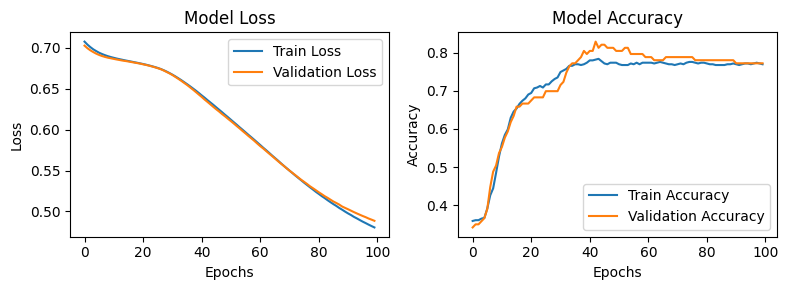

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3))

# Loss Plot 
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Accuracy Plot 
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Adjust layout and show
plt.tight_layout()
plt.show()